In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
migration_population=pd.read_csv('3_migration_population_merge_clean.csv')
migration_net=pd.read_csv('2_migration_merge_clean.csv')

In [3]:
migration_population_transpose=migration_population.T

In [4]:
migration_net_net=migration_net[[
                    'Country Name', 'Net Migration 1962', 'Net Migration 1967', 'Net Migration 1972',
                    'Net Migration 1977', 'Net Migration 1982', 'Net Migration 1987',
                    'Net Migration 1992', 'Net Migration 1997', 'Net Migration 2002', 'Net Migration 2007',
                    'Net Migration 2012', 'Net Migration 2017']]

In [5]:
migration_net.columns

Index(['Country Name', 'Country Code', 'Region', 'Income Group',
       'Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
       'Net Migration 2017', 'Population 2017', 'MigrRatePopn2017'],
      dtype='object')

In [6]:
migration_net_rate=migration_net[['Country Name','MigrRatePopn1962','MigrRatePopn1967','MigrRatePopn1972',
                                  'MigrRatePopn1977','MigrRatePopn1982','MigrRatePopn1987',
                                  'MigrRatePopn1992', 'MigrRatePopn1997', 'MigrRatePopn2002',
                                  'MigrRatePopn2007', 'MigrRatePopn2012','MigrRatePopn2017']]

# Top 10 for inmigration  (absolute value)

In [7]:
migration_net_net[(migration_net['Region'].isnull()==False)].nlargest(10,'Net Migration 2017')

,Country Name,Net Migration 1962,Net Migration 1967,Net Migration 1972,Net Migration 1977,Net Migration 1982,Net Migration 1987,Net Migration 1992,Net Migration 1997,Net Migration 2002,Net Migration 2007,Net Migration 2012,Net Migration 2017
248,United States,1835728.0,1556054.0,2889346.0,3770881.0,3382460.0,3366853.0,4463754.0,8859954.0,5334893.0,5428756.0,4961716.0,4774029.0
53,Germany,669314.0,871265.0,701731.0,228894.0,23.0,1683737.0,2628459.0,715944.0,824445.0,43087.0,1938576.0,2719112.0
241,Turkey,-149999.0,-180001.0,-240000.0,-259998.0,-70001.0,-100001.0,-120000.0,-99999.0,-39998.0,-50000.0,1763078.0,1419610.0
79,United Kingdom,143068.0,-84853.0,106415.0,39119.0,-97495.0,98758.0,205443.0,513361.0,992223.0,2189404.0,1300231.0,1303250.0
33,Canada,178691.0,611117.0,758104.0,420633.0,373939.0,859217.0,690555.0,783535.0,1052013.0,1326431.0,1241416.0,1210159.0
43,Colombia,-306563.0,-338635.0,-380422.0,-419350.0,-370972.0,-324000.0,-287950.0,-259000.0,-231000.0,-195000.0,-193380.0,1023981.0
199,Russian Federation,-1387844.0,-549722.0,-296861.0,614394.0,1100559.0,890253.0,2490121.0,2374657.0,1778101.0,2326672.0,1800600.0,912279.0
244,Uganda,124999.0,50004.0,-276112.0,-179999.0,-120001.0,200002.0,109998.0,-180002.0,-250002.0,-500000.0,-299994.0,843469.0
11,Australia,384343.0,806193.0,259531.0,235744.0,453572.0,654209.0,351078.0,388419.0,589282.0,1210802.0,989375.0,791229.0
113,Italy,-230527.0,-231781.0,19396.0,164927.0,264799.0,-10058.0,152825.0,-298237.0,1664343.0,1050948.0,1637369.0,744713.0


In [26]:
migration_net_to_plot=migration_net_net[(migration_net['Region'].isnull()==False)].nlargest(10,'Net Migration 2017').T


# Top 10 for inmigration (rate)

In [9]:
migration_net_rate[(migration_net['Region'].isnull()==False)].nlargest(10,'MigrRatePopn2017')

,Country Name,MigrRatePopn1962,MigrRatePopn1967,MigrRatePopn1972,MigrRatePopn1977,MigrRatePopn1982,MigrRatePopn1987,MigrRatePopn1992,MigrRatePopn1997,MigrRatePopn2002,MigrRatePopn2007,MigrRatePopn2012,MigrRatePopn2017
20,Bahrain,-0.024228,-0.040972,0.083450,0.161497,0.008379,0.028730,0.010476,0.065856,0.211523,0.262569,0.032309,0.159965
149,Maldives,-0.006122,-0.027019,0.019578,0.000000,0.000000,-0.012831,-0.013002,-0.004169,0.059119,0.053686,0.146910,0.114526
179,Oman,-0.017276,-0.007574,0.032806,0.078143,0.063173,0.006895,0.052791,-0.085952,0.006424,0.100483,0.253223,0.093658
141,Luxembourg,0.026585,0.017666,0.044097,0.032782,0.006982,0.034608,0.051100,0.047538,0.032438,0.088083,0.091731,0.081672
197,Qatar,0.291369,0.244038,0.263356,0.155700,0.368281,0.136248,-0.020452,0.055118,0.333791,0.750637,0.275424,0.073402
86,Equatorial Guinea,0.011433,0.017139,-0.241795,-0.123879,0.228363,0.052222,0.044721,0.065244,0.075948,0.097362,0.087277,0.063390
124,Kuwait,0.406109,0.254001,0.112495,0.122315,0.076503,0.061771,NaN,0.141499,0.012401,0.191492,0.173194,0.048717
143,"Macao SAR, China",0.108194,0.150400,-0.044106,-0.042395,0.100120,0.108592,0.060294,0.069425,0.103124,0.084004,0.075083,0.040155
36,Channel Islands,0.026324,0.033029,0.034381,0.013571,0.041391,0.044493,0.008239,0.015759,0.010114,0.038607,0.022029,0.040044
12,Austria,0.002244,0.006832,0.010869,0.000727,0.002377,0.014654,0.029059,0.008168,0.022039,0.018536,0.031693,0.036942


# Top 10 for emmigration (absolute value)

In [10]:
migration_net_net[(migration_net['Region'].isnull()==False)].nsmallest(10,'Net Migration 2017')

,Country Name,Net Migration 1962,Net Migration 1967,Net Migration 1972,Net Migration 1977,Net Migration 1982,Net Migration 1987,Net Migration 1992,Net Migration 1997,Net Migration 2002,Net Migration 2007,Net Migration 2012,Net Migration 2017
251,"Venezuela, RB",18870.0,3160.0,940.0,1120.0,1380.0,920.0,-2270.0,-4540.0,-22740.0,-200220.0,-431040.0,-3266243.0
107,India,-85391.0,-342846.0,2106041.0,1111236.0,579708.0,45150.0,-552948.0,-682569.0,-1888986.0,-2655844.0,-2350075.0,-2663434.0
224,Syrian Arab Republic,-16000.0,-16000.0,-81501.0,-161672.0,-87001.0,-146501.0,-70000.0,-130000.0,-379910.0,370000.0,-5386986.0,-2136954.0
18,Bangladesh,-142378.0,-161822.0,-3045287.0,-1137344.0,-793826.0,-219363.0,-813794.0,-719899.0,-1492537.0,-3254778.0,-2306839.0,-1847503.0
38,China,-1125727.0,-160002.0,-1105479.0,-47004.0,-200000.0,-431651.0,-779982.0,-382999.0,-1965578.0,-2178385.0,-1552209.0,-1741996.0
181,Pakistan,-93268.0,-209978.0,-138106.0,672203.0,1387118.0,139790.0,-1023387.0,470909.0,-650182.0,-339805.0,-1079167.0,-1166895.0
213,South Sudan,0.0,0.0,25000.0,60000.0,150000.0,-416233.0,-1097076.0,300000.0,432000.0,846611.0,-100000.0,-870998.0
157,Myanmar,0.0,0.0,0.0,0.0,-54656.0,-200000.0,-713704.0,-537998.0,-1208092.0,-1336928.0,-528211.0,-816564.0
262,Zimbabwe,-15009.0,-42001.0,-45547.0,-152283.0,99068.0,84354.0,-298236.0,-524671.0,-697817.0,-512676.0,-622997.0,-584288.0
104,Indonesia,449965.0,556062.0,508276.0,378743.0,475080.0,261282.0,-35412.0,-67671.0,-1149655.0,-1333685.0,-454447.0,-494777.0


# Top 10 for emmigration ( by rate)

In [11]:
migration_net_rate[(migration_net['Region'].isnull()==False)].nsmallest(10,'MigrRatePopn2017')

,Country Name,MigrRatePopn1962,MigrRatePopn1967,MigrRatePopn1972,MigrRatePopn1977,MigrRatePopn1982,MigrRatePopn1987,MigrRatePopn1992,MigrRatePopn1997,MigrRatePopn2002,MigrRatePopn2007,MigrRatePopn2012,MigrRatePopn2017
189,Puerto Rico,-0.037378,-0.050745,-0.014564,-0.006339,-0.014774,-0.016036,-0.000083,-0.008100,-0.038105,-0.036490,-0.066777,-0.147335
224,Syrian Arab Republic,-0.003282,-0.002787,-0.011985,-0.020057,-0.009072,-0.012895,-0.005308,-0.008567,-0.022237,0.018613,-0.263518,-0.125202
251,"Venezuela, RB",0.002158,0.000305,0.000078,0.000080,0.000086,0.000050,-0.000110,-0.000199,-0.000906,-0.007348,-0.014680,-0.111133
213,South Sudan,0.000000,0.000000,0.006828,0.014477,0.031254,-0.076798,-0.206783,0.055436,0.064591,0.101816,-0.009888,-0.079829
257,Samoa,-0.029384,-0.050702,-0.101252,-0.123864,-0.118795,-0.121306,-0.084585,-0.099618,-0.088664,-0.082864,-0.064462,-0.071732
67,Eritrea,0.006598,0.004130,0.007221,0.006283,0.005444,-0.018802,-0.139428,-0.059220,0.091610,-0.026700,-0.075690,-0.058393
140,Lithuania,0.008631,0.008643,0.011757,0.011569,0.012670,0.010193,-0.027108,-0.026272,-0.028784,-0.046709,-0.048938,-0.057949
32,Central African Republic,0.007687,0.007695,-0.026770,-0.000490,0.017128,-0.030225,0.016896,0.008843,-0.006419,-0.029922,-0.089290,-0.043516
262,Zimbabwe,-0.003716,-0.008787,-0.008027,-0.022685,0.012448,0.008854,-0.027360,-0.045024,-0.058374,-0.041831,-0.047502,-0.041041
216,Sao Tome and Principe,-0.141938,-0.010934,-0.032194,-0.013858,-0.060308,-0.019863,-0.044944,-0.070315,-0.056970,-0.020391,-0.044585,-0.040567


In [12]:
mig_pop_2017=migration_population[['Country Name','Net Migration 2017', 'Population 2017']]

In [13]:
migration_net.loc[(migration_net['Net Migration 2017']
                    >= 5000) & (migration_net['Region'].isnull()==False)].sort_values(
                    by = 'Net Migration 2017', ascending = False)[[
                    'Country Name', 'Net Migration 1962', 'Net Migration 1967', 'Net Migration 1972',
                    'Net Migration 1977', 'Net Migration 1982', 'Net Migration 1987',
                    'Net Migration 1992', 'Net Migration 1997', 'Net Migration 2002', 'Net Migration 2007',
                    'Net Migration 2012', 'Net Migration 2017']].head(20)

,Country Name,Net Migration 1962,Net Migration 1967,Net Migration 1972,Net Migration 1977,Net Migration 1982,Net Migration 1987,Net Migration 1992,Net Migration 1997,Net Migration 2002,Net Migration 2007,Net Migration 2012,Net Migration 2017
248,United States,1835728.0,1556054.0,2889346.0,3770881.0,3382460.0,3366853.0,4463754.0,8859954.0,5334893.0,5428756.0,4961716.0,4774029.0
53,Germany,669314.0,871265.0,701731.0,228894.0,23.0,1683737.0,2628459.0,715944.0,824445.0,43087.0,1938576.0,2719112.0
241,Turkey,-149999.0,-180001.0,-240000.0,-259998.0,-70001.0,-100001.0,-120000.0,-99999.0,-39998.0,-50000.0,1763078.0,1419610.0
79,United Kingdom,143068.0,-84853.0,106415.0,39119.0,-97495.0,98758.0,205443.0,513361.0,992223.0,2189404.0,1300231.0,1303250.0
33,Canada,178691.0,611117.0,758104.0,420633.0,373939.0,859217.0,690555.0,783535.0,1052013.0,1326431.0,1241416.0,1210159.0
43,Colombia,-306563.0,-338635.0,-380422.0,-419350.0,-370972.0,-324000.0,-287950.0,-259000.0,-231000.0,-195000.0,-193380.0,1023981.0
199,Russian Federation,-1387844.0,-549722.0,-296861.0,614394.0,1100559.0,890253.0,2490121.0,2374657.0,1778101.0,2326672.0,1800600.0,912279.0
244,Uganda,124999.0,50004.0,-276112.0,-179999.0,-120001.0,200002.0,109998.0,-180002.0,-250002.0,-500000.0,-299994.0,843469.0
11,Australia,384343.0,806193.0,259531.0,235744.0,453572.0,654209.0,351078.0,388419.0,589282.0,1210802.0,989375.0,791229.0
113,Italy,-230527.0,-231781.0,19396.0,164927.0,264799.0,-10058.0,152825.0,-298237.0,1664343.0,1050948.0,1637369.0,744713.0


# Creating Pivot Table for Time plottings 

In [16]:
migration_net_to_plot=migration_net_net[(migration_net['Region'].isnull()==False)].nlargest(10,'Net Migration 2017').T

In [17]:
migration_net_to_plot

,248,53,241,79,33,43,199,244,11,113
Country Name,United States,Germany,Turkey,United Kingdom,Canada,Colombia,Russian Federation,Uganda,Australia,Italy
Net Migration 1962,1.83573e+06,669314,-149999,143068,178691,-306563,-1.38784e+06,124999,384343,-230527
Net Migration 1967,1.55605e+06,871265,-180001,-84853,611117,-338635,-549722,50004,806193,-231781
Net Migration 1972,2.88935e+06,701731,-240000,106415,758104,-380422,-296861,-276112,259531,19396
Net Migration 1977,3.77088e+06,228894,-259998,39119,420633,-419350,614394,-179999,235744,164927
Net Migration 1982,3.38246e+06,23,-70001,-97495,373939,-370972,1.10056e+06,-120001,453572,264799
Net Migration 1987,3.36685e+06,1.68374e+06,-100001,98758,859217,-324000,890253,200002,654209,-10058
Net Migration 1992,4.46375e+06,2.62846e+06,-120000,205443,690555,-287950,2.49012e+06,109998,351078,152825
Net Migration 1997,8.85995e+06,715944,-99999,513361,783535,-259000,2.37466e+06,-180002,388419,-298237
Net Migration 2002,5.33489e+06,824445,-39998,992223,1.05201e+06,-231000,1.7781e+06,-250002,589282,1.66434e+06


In [18]:
index=[pd.date_range(start='1962', periods=12, freq='5Y')]
index

[DatetimeIndex(['1962-12-31', '1967-12-31', '1972-12-31', '1977-12-31',
                '1982-12-31', '1987-12-31', '1992-12-31', '1997-12-31',
                '2002-12-31', '2007-12-31', '2012-12-31', '2017-12-31'],
               dtype='datetime64[ns]', freq='5A-DEC')]

In [19]:
migration_net_to_plot.columns

Int64Index([248, 53, 241, 79, 33, 43, 199, 244, 11, 113], dtype='int64')

In [20]:
new_header = migration_net_to_plot.iloc[0] #grab the first row for the header
migration_net_to_plot = migration_net_to_plot[1:] #take the data less the header row
migration_net_to_plot.columns = new_header #set the header row as the df header

In [21]:
migration_net_to_plot.columns

Index(['United States', 'Germany', 'Turkey', 'United Kingdom', 'Canada',
       'Colombia', 'Russian Federation', 'Uganda', 'Australia', 'Italy'],
      dtype='object', name='Country Name')

In [23]:
migration_net_to_plot=migration_net_to_plot.set_index(index).copy()

In [25]:
migration_net_to_plot

Country Name,United States,Germany,Turkey,United Kingdom,Canada,Colombia,Russian Federation,Uganda,Australia,Italy
1962-12-31,1.83573e+06,669314,-149999,143068,178691,-306563,-1.38784e+06,124999,384343,-230527
1967-12-31,1.55605e+06,871265,-180001,-84853,611117,-338635,-549722,50004,806193,-231781
1972-12-31,2.88935e+06,701731,-240000,106415,758104,-380422,-296861,-276112,259531,19396
1977-12-31,3.77088e+06,228894,-259998,39119,420633,-419350,614394,-179999,235744,164927
1982-12-31,3.38246e+06,23,-70001,-97495,373939,-370972,1.10056e+06,-120001,453572,264799
1987-12-31,3.36685e+06,1.68374e+06,-100001,98758,859217,-324000,890253,200002,654209,-10058
1992-12-31,4.46375e+06,2.62846e+06,-120000,205443,690555,-287950,2.49012e+06,109998,351078,152825
1997-12-31,8.85995e+06,715944,-99999,513361,783535,-259000,2.37466e+06,-180002,388419,-298237
2002-12-31,5.33489e+06,824445,-39998,992223,1.05201e+06,-231000,1.7781e+06,-250002,589282,1.66434e+06
2007-12-31,5.42876e+06,43087,-50000,2.1894e+06,1.32643e+06,-195000,2.32667e+06,-500000,1.2108e+06,1.05095e+06


Text(0.5, 1.0, 'Top 10 countries by net migration')

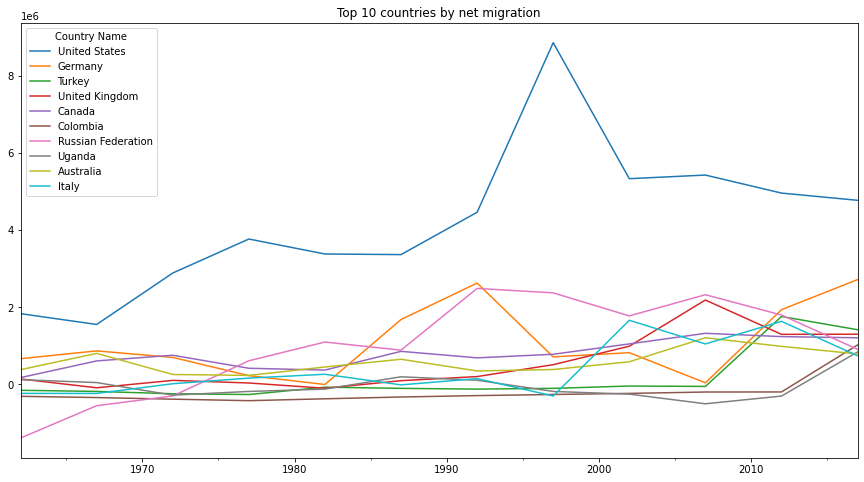

In [24]:
migration_net_to_plot.plot(kind='line',figsize=(15,8))
plt.title("Top 10 countries by net migration")
#plt.xlabel("Family Member")
#plt.ylabel("")

# OLS Models

We used different approaches to see what are the factors that affect the most the net migration. 

In [27]:
migration_happiness=pd.read_csv('4_migration_hapiness_merge.csv')

In [28]:
migration_happiness

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Net Migration 1962,Population 1962,MigrRatePopn1962,Net Migration 1967,Population 1967,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,Aruba,ABW,Latin America & Caribbean,High income,-4323.0,56225.0,-0.076888,-4275.0,58055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,AFG,South Asia,Low income,-20000.0,9351441.0,-0.002139,-20000.0,10399926.0,...,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
2,2,Angola,AGO,Sub-Saharan Africa,Lower middle income,-296717.0,5608539.0,-0.052905,-587286.0,5774243.0,...,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
3,3,Albania,ALB,Europe & Central Asia,Upper middle income,-99.0,1711319.0,-0.000058,-99.0,1965598.0,...,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
4,4,Andorra,AND,Europe & Central Asia,High income,NaN,15370.0,NaN,NaN,20758.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,106550.0,17965725.0,0.005931,199359.0,20406864.0,...,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909
261,261,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,-35328.0,3260650.0,-0.010835,-22042.0,3797873.0,...,4.514,4.644106,4.383894,0.636407,1.003187,0.257836,0.461603,0.249580,0.078214,1.826705
262,262,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,-15009.0,4039201.0,-0.003716,-42001.0,4779827.0,...,3.875,3.978700,3.771300,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970
263,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.422,6.494596,6.349404,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607


In [29]:
migration_happiness_no_null=migration_happiness.copy().dropna()

In [30]:
migration_happiness_no_null

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Net Migration 1962,Population 1962,MigrRatePopn1962,Net Migration 1967,Population 1967,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
1,1,Afghanistan,AFG,South Asia,Low income,-20000.0,9351441.0,-0.002139,-20000.0,10399926.0,...,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
2,2,Angola,AGO,Sub-Saharan Africa,Lower middle income,-296717.0,5608539.0,-0.052905,-587286.0,5774243.0,...,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
3,3,Albania,ALB,Europe & Central Asia,Upper middle income,-99.0,1711319.0,-0.000058,-99.0,1965598.0,...,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
6,6,United Arab Emirates,ARE,Middle East & North Africa,High income,37882.0,112118.0,0.337876,53823.0,169771.0,...,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704
7,7,Argentina,ARG,Latin America & Caribbean,Upper middle income,122000.0,21153052.0,0.005767,130000.0,22828869.0,...,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,Vietnam,VNM,East Asia & Pacific,Lower middle income,0.0,34683407.0,0.000000,0.0,40072948.0,...,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319
259,259,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,-100000.0,5473671.0,-0.018269,-245662.0,5907874.0,...,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
260,260,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,106550.0,17965725.0,0.005931,199359.0,20406864.0,...,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909
261,261,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,-35328.0,3260650.0,-0.010835,-22042.0,3797873.0,...,4.514,4.644106,4.383894,0.636407,1.003187,0.257836,0.461603,0.249580,0.078214,1.826705


In [33]:
migration_happiness_no_null=migration_happiness_no_null.drop('Unnamed: 0', axis=1).copy()

In [34]:
migration_happiness_no_null.columns

Index(['Country Name', 'Country Code', 'Region', 'Income Group',
       'Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
       'Net Migration 2017', 'Population 2017', 'MigrRatePopn2017', 'Country',
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.'

# OLS for 'Net Migration 2017'

Here we used all the information contained in the tables to see which features are most likely to affect the migration. 

In [55]:
target_feature='Net Migration 2017'
predictors=['const','Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
        'Population 2017', 
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual']

In [42]:
import pandas as pd
import numpy as np
import uuid
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.base import TransformerMixin
from scipy import stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("ticks")

In [52]:
migration_happiness_no_null_num = migration_happiness_no_null[list(migration_happiness_no_null._get_numeric_data().columns)].reset_index(drop=True)
migration_happiness_no_null_num.columns

Index(['const', 'Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
       'Net Migration 2017', 'Population 2017', 'MigrRatePopn2017',
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosi

In [49]:
migration_happiness_no_null = sm.add_constant(migration_happiness_no_null)

In [56]:
y = migration_happiness_no_null_num[target_feature]
X = migration_happiness_no_null_num[ predictors]
lin_reg = sm.OLS(y, X).fit()

In [57]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Net Migration 2017   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     17.11
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.11e-31
Time:                        17:28:45   Log-Likelihood:                -2076.1
No. Observations:                 150   AIC:                             4242.
Df Residuals:                     105   BIC:                             4378.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.625e+04   1.63e+06     -0.016      0.987   -3.25e+06     3.2e+06
Net Migration 1962                0.2249      0.350      0.643      0.522      -0.469       0.918
Population 1962                  -0.2159      0.226     -0.955      0.342      -0.664       0.232
MigrRatePopn1962              -8.008e+05   1.87e+06     -0.428      0.670   -4.51e+06    2.91e+06
Net Migration 1967                0.1546      0.370      0.418      0.677      -0.578       0.888
Population 1967                   0.7613      0.442      1.723      0.088      -0.115       1.637
MigrRatePopn1967                2.95e+05   1.59e+06      0.185      0.853   -2.86e+06    3.45e+06
Net Migration 1972               -0.2111      0.236     -0.894      0.373      -0.679       0.257
Population 1972                  -1.1996      0.489     -2.455      0.016      -2.168      -0.231
MigrRatePopn1972              -5.215e+05   1.26e+06     -0.415      0.679   -3.01e+06    1.97e+06
Net Migration 1977                0.0596      0.181      0.329      0.743      -0.299       0.419
Population 1977                   1.0048      0.494      2.033      0.045       0.025       1.985
MigrRatePopn1977              -6.658e+05   1.11e+06     -0.601      0.549   -2.86e+06    1.53e+06
Net Migration 1982               -0.1077      0.208     -0.518      0.606      -0.520       0.305
Population 1982                  -0.4466      0.401     -1.112      0.269      -1.243       0.349
MigrRatePopn1982               1.348e+06   1.82e+06      0.742      0.460   -2.25e+06    4.95e+06
Net Migration 1987                0.0637      0.257      0.248      0.805      -0.446       0.574
Population 1987                   0.1005      0.337      0.298      0.766      -0.568       0.769
MigrRatePopn1987               5.508e+05   1.93e+06      0.285      0.776   -3.28e+06    4.38e+06
Net Migration 1992               -0.1072      0.153     -0.699      0.486      -0.411       0.197
Population 1992                  -0.2567      0.349     -0.736      0.464      -0.949       0.435
MigrRatePopn1992              -4.143e+05   1.08e+06     -0.384      0.702   -2.55e+06    1.72e+06
Net Migration 1997                0.3551      0.165      2.159      0.033       0.029       0.681
Population 1997                   0.6502      0.328      1.982      0.050      -0.000       1.300
MigrRatePopn1997              -1.869e+05   1.04e+06     -0.180      0.858   -2.25e+06    1.88e+06
Net Migration 2002               -0.6402      0.191     -3.350      0.001      -1.019      -0.261
Population 2002                  -1.1704      0.364     -3.217      0.002      -1.892      -0.449
MigrRatePopn2002               8.635e+05   1.85e+06      0.467      0.642    -2.8e+06    4.53e+06
Net Migration 2007                0.7120     

As expected the coefficients values are affected by multicolinearity, for further analysis we'd like to inpect more in deepth how are they correlated and then improve the model by using only a minimun number of features that are no colinear. 

In [138]:
migration_happiness_no_null_num.corr()['Net Migration 2017'].to_frame()

,Net Migration 2017
const,NaN
Net Migration 1962,0.417488
Population 1962,-0.170793
MigrRatePopn1962,0.059804
Net Migration 1967,0.481968
Population 1967,-0.182536
MigrRatePopn1967,0.072761
Net Migration 1972,0.418565
Population 1972,-0.195988
MigrRatePopn1972,0.074268


# OLS for  MigrRatePopn2017 

We also wanted to check if the same factors used for the last model also affect the migration rate. 

In [59]:
target_feature='MigrRatePopn2017'
predictors=['const','Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
        'Population 2017', 
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual']

In [60]:
Y = migration_happiness_no_null_num[target_feature]
x = migration_happiness_no_null_num[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [61]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MigrRatePopn2017   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     5.344
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.06e-12
Time:                        17:33:13   Log-Likelihood:                 421.12
No. Observations:                 150   AIC:                            -752.2
Df Residuals:                     105   BIC:                            -616.8
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0819      0.096      0.854      0.395      -0.108       0.272
Net Migration 1962             1.269e-08   2.06e-08      0.617      0.539   -2.81e-08    5.35e-08
Population 1962               -1.177e-09   1.33e-08     -0.088      0.930   -2.76e-08    2.52e-08
MigrRatePopn1962                 -0.1183      0.110     -1.074      0.285      -0.337       0.100
Net Migration 1967             8.226e-09   2.18e-08      0.378      0.706   -3.49e-08    5.14e-08
Population 1967                1.258e-08    2.6e-08      0.484      0.630    -3.9e-08    6.42e-08
MigrRatePopn1967                 -0.0925      0.094     -0.989      0.325      -0.278       0.093
Net Migration 1972            -1.302e-08   1.39e-08     -0.936      0.351   -4.06e-08    1.45e-08
Population 1972               -3.102e-08   2.88e-08     -1.079      0.283   -8.81e-08     2.6e-08
MigrRatePopn1972                 -0.0735      0.074     -0.994      0.322      -0.220       0.073
Net Migration 1977             4.157e-09   1.07e-08      0.390      0.697    -1.7e-08    2.53e-08
Population 1977                3.475e-08   2.91e-08      1.194      0.235    -2.3e-08    9.25e-08
MigrRatePopn1977                  0.0540      0.065      0.828      0.409      -0.075       0.183
Net Migration 1982             2.442e-08   1.22e-08      1.995      0.049    1.43e-10    4.87e-08
Population 1982               -2.695e-08   2.36e-08     -1.141      0.257   -7.38e-08    1.99e-08
MigrRatePopn1982                 -0.2975      0.107     -2.782      0.006      -0.510      -0.085
Net Migration 1987            -2.295e-08   1.51e-08     -1.516      0.132    -5.3e-08    7.06e-09
Population 1987                1.695e-08   1.99e-08      0.854      0.395   -2.24e-08    5.63e-08
MigrRatePopn1987                  0.2975      0.114      2.616      0.010       0.072       0.523
Net Migration 1992             8.718e-09   9.03e-09      0.965      0.337   -9.19e-09    2.66e-08
Population 1992                -1.56e-08   2.05e-08     -0.759      0.449   -5.63e-08    2.51e-08
MigrRatePopn1992                 -0.0878      0.064     -1.382      0.170      -0.214       0.038
Net Migration 1997             1.341e-10   9.68e-09      0.014      0.989   -1.91e-08    1.93e-08
Population 1997                2.377e-08   1.93e-08      1.231      0.221   -1.45e-08    6.21e-08
MigrRatePopn1997                  0.0463      0.061      0.756      0.451      -0.075       0.168
Net Migration 2002            -9.139e-09   1.13e-08     -0.812      0.418   -3.14e-08    1.32e-08
Population 2002               -3.512e-08   2.14e-08     -1.640      0.104   -7.76e-08    7.34e-09
MigrRatePopn2002                 -0.0028      0.109     -0.026      0.980      -0.219       0.213
Net Migration 2007             3.292e-09   8.

In [137]:
migration_happiness_no_null_num.corr()['MigrRatePopn2017'].to_frame()

,MigrRatePopn2017
const,NaN
Net Migration 1962,0.067604
Population 1962,0.014627
MigrRatePopn1962,0.174704
Net Migration 1967,0.122212
Population 1967,0.012134
MigrRatePopn1967,0.164473
Net Migration 1972,0.107678
Population 1972,0.009406
MigrRatePopn1972,0.226253


To avoid the multicolinearity we proceed with models using specific features that we considered more likely to affect the migration by themselves.

# OLS using Region and Income group

In [63]:
migration_happiness_no_null

,const,Country Name,Country Code,Region,Income Group,Net Migration 1962,Population 1962,MigrRatePopn1962,Net Migration 1967,Population 1967,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
1,1.0,Afghanistan,AFG,South Asia,Low income,-20000.0,9351441.0,-0.002139,-20000.0,10399926.0,...,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
2,1.0,Angola,AGO,Sub-Saharan Africa,Lower middle income,-296717.0,5608539.0,-0.052905,-587286.0,5774243.0,...,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
3,1.0,Albania,ALB,Europe & Central Asia,Upper middle income,-99.0,1711319.0,-0.000058,-99.0,1965598.0,...,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
6,1.0,United Arab Emirates,ARE,Middle East & North Africa,High income,37882.0,112118.0,0.337876,53823.0,169771.0,...,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704
7,1.0,Argentina,ARG,Latin America & Caribbean,Upper middle income,122000.0,21153052.0,0.005767,130000.0,22828869.0,...,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1.0,Vietnam,VNM,East Asia & Pacific,Lower middle income,0.0,34683407.0,0.000000,0.0,40072948.0,...,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319
259,1.0,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,-100000.0,5473671.0,-0.018269,-245662.0,5907874.0,...,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
260,1.0,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,106550.0,17965725.0,0.005931,199359.0,20406864.0,...,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909
261,1.0,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,-35328.0,3260650.0,-0.010835,-22042.0,3797873.0,...,4.514,4.644106,4.383894,0.636407,1.003187,0.257836,0.461603,0.249580,0.078214,1.826705


In [67]:
region_and_income=pd.get_dummies(migration_happiness_no_null[['Region', 'Income Group']])

In [68]:
migration_income= pd.concat([migration_happiness_no_null_num, region_and_income], axis=1, sort=False)

In [72]:
migration_income=migration_income.dropna().copy()

In [73]:
migration_income

,const,Net Migration 1962,Population 1962,MigrRatePopn1962,Net Migration 1967,Population 1967,MigrRatePopn1967,Net Migration 1972,Population 1972,MigrRatePopn1972,...,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Income Group_High income,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income
1,1.0,-296717.0,5608539.0,-0.052905,-587286.0,5774243.0,-0.101708,199800.0,6248552.0,0.031975,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,-99.0,1711319.0,-0.000058,-99.0,1965598.0,-0.000050,-99.0,2243126.0,-0.000044,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,37882.0,112118.0,0.337876,53823.0,169771.0,0.317033,260488.0,330974.0,0.787035,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,384343.0,10742000.0,0.035779,806193.0,11799000.0,0.068327,259531.0,13177000.0,0.019696,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,15996.0,7129864.0,0.002244,50401.0,7376998.0,0.006832,82001.0,7544201.0,0.010869,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1.0,-6000.0,2603882.0,-0.002304,-34000.0,2750086.0,-0.012363,-136000.0,2821461.0,-0.048202,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
142,1.0,1835728.0,186538000.0,0.009841,1556054.0,198712000.0,0.007831,2889346.0,209896000.0,0.013766,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145,1.0,0.0,34683407.0,0.000000,0.0,40072948.0,0.000000,0.0,45548479.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
147,1.0,106550.0,17965725.0,0.005931,199359.0,20406864.0,0.009769,222659.0,23281508.0,0.009564,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
migration_income=sm.add_constant(migration_income)

In [76]:
migration_income.columns

Index(['const', 'Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
       'Net Migration 2017', 'Population 2017', 'MigrRatePopn2017',
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosi

In [77]:
predictors=['const', 'Net Migration 1962', 'Population 1962', 'MigrRatePopn1962',
       'Net Migration 1967', 'Population 1967', 'MigrRatePopn1967',
       'Net Migration 1972', 'Population 1972', 'MigrRatePopn1972',
       'Net Migration 1977', 'Population 1977', 'MigrRatePopn1977',
       'Net Migration 1982', 'Population 1982', 'MigrRatePopn1982',
       'Net Migration 1987', 'Population 1987', 'MigrRatePopn1987',
       'Net Migration 1992', 'Population 1992', 'MigrRatePopn1992',
       'Net Migration 1997', 'Population 1997', 'MigrRatePopn1997',
       'Net Migration 2002', 'Population 2002', 'MigrRatePopn2002',
       'Net Migration 2007', 'Population 2007', 'MigrRatePopn2007',
       'Net Migration 2012', 'Population 2012', 'MigrRatePopn2012',
        'Population 2017', 
       'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Latin America & Caribbean',
       'Region_Middle East & North Africa', 'Region_North America',
       'Region_South Asia', 'Region_Sub-Saharan Africa',
       'Income Group_High income', 'Income Group_Low income',
       'Income Group_Lower middle income', 'Income Group_Upper middle income']
target_feature='Net Migration 2017'

In [78]:
Y = migration_income[target_feature]
x = migration_income[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [79]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Net Migration 2017   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     18.67
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           5.25e-14
Time:                        17:47:33   Log-Likelihood:                -1130.1
No. Observations:                  86   AIC:                             2368.
Df Residuals:                      32   BIC:                             2501.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.087e+05   1.31e+06      0.083      0.934   -2.56e+06    2.78e+06
Net Migration 1962                   -0.9869      0.386     -2.559      0.015      -1.772      -0.201
Population 1962                      -0.9005      0.334     -2.694      0.011      -1.581      -0.220
MigrRatePopn1962                  -1.448e+06   2.29e+06     -0.632      0.532   -6.12e+06    3.22e+06
Net Migration 1967                    1.0574      0.461      2.295      0.028       0.119       1.996
Population 1967                       1.9011      0.659      2.883      0.007       0.558       3.244
MigrRatePopn1967                   7.975e+05   2.12e+06      0.376      0.709   -3.52e+06    5.12e+06
Net Migration 1972                    0.2663      0.351      0.758      0.454      -0.449       0.982
Population 1972                      -1.5128      0.884     -1.712      0.097      -3.313       0.287
MigrRatePopn1972                   5.104e+05   1.74e+06      0.294      0.771   -3.03e+06    4.05e+06
Net Migration 1977                    0.1070      0.383      0.279      0.782      -0.674       0.888
Population 1977                       1.0577      0.937      1.128      0.268      -0.852       2.967
MigrRatePopn1977                   -1.17e+06   1.86e+06     -0.628      0.535   -4.97e+06    2.63e+06
Net Migration 1982                    0.8940      0.460      1.943      0.061      -0.043       1.831
Population 1982                      -0.2669      0.596     -0.448      0.657      -1.480       0.946
MigrRatePopn1982                   1.305e+06    2.5e+06      0.523      0.605   -3.78e+06    6.39e+06
Net Migration 1987                   -0.8403      0.448     -1.877      0.070      -1.752       0.072
Population 1987                      -0.6424      0.326     -1.971      0.057      -1.306       0.022
MigrRatePopn1987                   1.694e+06   3.11e+06      0.544      0.590   -4.65e+06    8.04e+06
Net Migration 1992                   -0.2836      0.246     -1.153      0.257      -0.784       0.217
Population 1992                       0.2094      0.409      0.511      0.613      -0.625       1.043
MigrRatePopn1992                  -9.797e+05    1.4e+06     -0.701      0.488   -3.82e+06    1.87e+06
Net Migration 1997                   -0.0444      0.309     -0.144      0.887      -0.673       0.584
Population 1997                       0.0776      0.323      0.240      0.812      -0.581       0.736
MigrRatePopn1997                   2.276e+06   1.87e+06      1.216      0.233   -1.53e+06    6.09e+06
Net Migration 2002                   -0.2154      0.389     -0.553      0.584      -1.008       0.578
Population 2002                      -0.2307      0.542     -0.426      0.673      -1.335       0.873
MigrRatePopn2002       

In [101]:
Net_2017_hat= lin_reg.predict()

In [105]:
x=migration_income['Net Migration 2017']

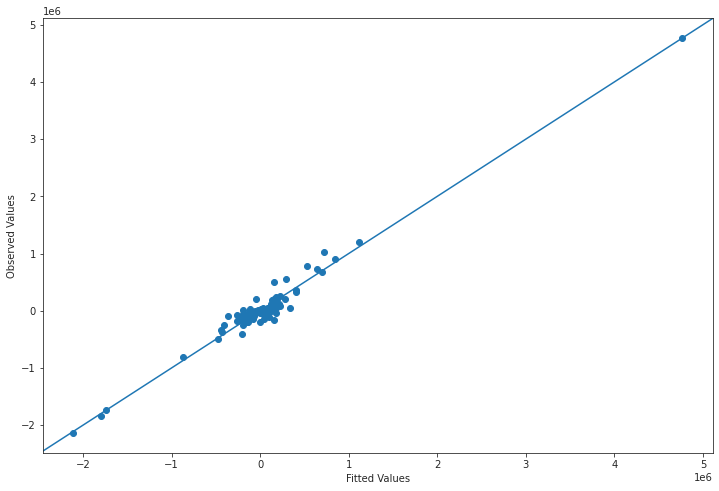

In [107]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='Observed Values', xlabel='Fitted Values')
ax.scatter(Net_2017_hat, x)
y_vs_yhat = sm.OLS(Net_2017_hat, sm.add_constant(Net_2017_hat, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)

In [139]:
migration_income.corr()['Net Migration 2017'].to_frame()

,Net Migration 2017
const,NaN
Net Migration 1962,0.500403
Population 1962,-0.058646
MigrRatePopn1962,0.070389
Net Migration 1967,0.568123
Population 1967,-0.074099
MigrRatePopn1967,0.089278
Net Migration 1972,0.771467
Population 1972,-0.091392
MigrRatePopn1972,0.093559


# OLS model  to predict net migration in 2017 using only the data from happines table from the same year

In [115]:
predictors=['const', 
        'Happiness.Score', 
        'Health..Life.Expectancy.']
target_feature='Net Migration 2017'

In [116]:
Y = migration_income[target_feature]
x = migration_income[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [117]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Net Migration 2017   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     9.771
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           0.000155
Time:                        10:32:09   Log-Likelihood:                -1270.0
No. Observations:                  86   AIC:                             2546.
Df Residuals:                      83   BIC:                             2553.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.529e+06   3.63e+05     -4.213      0.000   -2.25e+06   -8.07e+05
Happiness.Score            3.96e+05   9.78e+04      4.049      0.000    2.01e+05    5.91e+05
Health..Life.Expectancy. -1.013e+06   4.93e+05     -2.055      0.043   -1.99e+06   -3.24e+04
==============================================================================
Omnibus:                       97.563   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2327.292
Skew:                           3.277   Prob(JB):                         0.00
Kurtosis:                      27.628   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
Net_2017_hap= lin_reg.predict()

In [120]:
x=migration_income['Net Migration 2017']

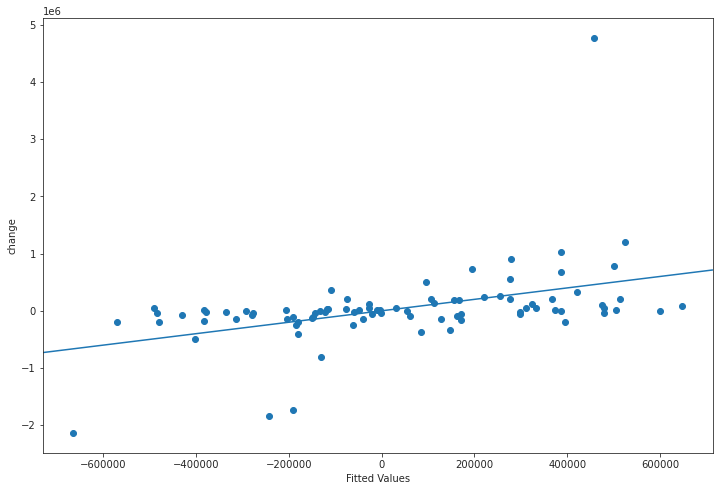

In [122]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='change', xlabel='Fitted Values')
ax.scatter(Net_2017_hap, x)
y_vs_yhat = sm.OLS(Net_2017_hap, sm.add_constant(Net_2017_hap, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)

# OLS using only income group of the countries 

In [123]:
predictors=['const', 
       'Income Group_High income', 'Income Group_Low income',
       'Income Group_Lower middle income', 'Income Group_Upper middle income']
target_feature='Net Migration 2017'

In [124]:
Y = migration_income[target_feature]
x = migration_income[ predictors]
lin_reg = sm.OLS(Y, x).fit()

In [125]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Net Migration 2017   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.592
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.198
Time:                        10:41:50   Log-Likelihood:                -1276.6
No. Observations:                  86   AIC:                             2561.
Df Residuals:                      82   BIC:                             2571.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             2.873e+04   6.53e+04      0.440      0.661   -1.01e+05    1.59e+05
Income Group_High income          1.885e+05   1.18e+05      1.600      0.113   -4.59e+04    4.23e+05
Income Group_Low income           3.871e+04   1.82e+05      0.213      0.832   -3.23e+05    4.01e+05
Income Group_Lower middle income  1.779e+04   1.37e+05      0.130      0.897   -2.54e+05     2.9e+05
Income Group_Upper middle income -2.163e+05   1.24e+05     -1.745      0.085   -4.63e+05    3.03e+04
==============================================================================
Omnibus:                       94.474   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2007.698
Skew:                           3.167   Prob(JB):                         0.00
Kurtosis:                      25.807   Cond. No.                     5.53e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [127]:
Net_2017_inc= lin_reg.predict()

In [128]:
x=migration_income['Net Migration 2017']

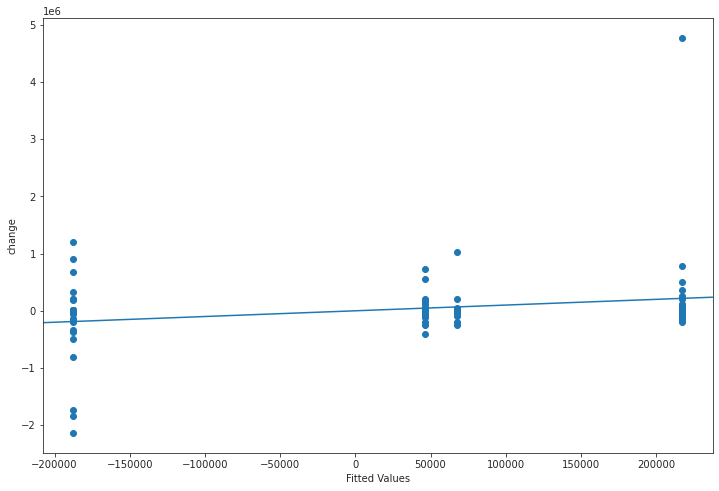

In [129]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, ylabel='change', xlabel='Fitted Values')
ax.scatter(Net_2017_inc, x)
y_vs_yhat = sm.OLS(Net_2017_inc, sm.add_constant(Net_2017_inc, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)